In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


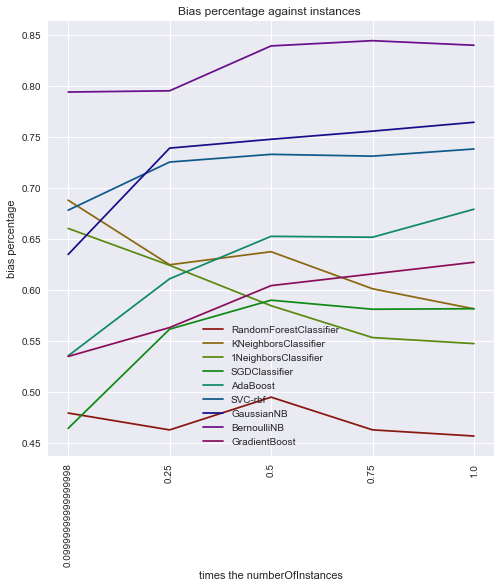

In [6]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])
        
Bias = []
for i in enumerate(clfNames):
    Bias.append([])
for i,item in enumerate(Single):
    for j,itemz in enumerate(Single[i]):
        sumB = 0
        for k,biVaEr in enumerate(Single[i][j]):
            if biVaEr[2] == 0:
                sumB = sumB + biVaEr[0]/1
            else:
                sumB = sumB + biVaEr[0]/biVaEr[2]
            
        
        Bias[i].append(sumB/len(itemz))
amountList.append(0.0)
amountList = [1-i for i in amountList]
cl = sns.hls_palette(len(Bias), l=.3, s=.8)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(Bias)):
    _= ax.plot(range(len(Bias[i])),Bias[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(range(len(Bias[i])),amountList ,rotation='vertical')
_=plt.title('Bias percentage against instances ',fontdict = {'fontsize': 22})
_=plt.ylabel('bias percentage',fontdict = {'fontsize': 22})
_=plt.xlabel('times the numberOfInstances',fontdict = {'fontsize': 22})
fig.set_figheight(8)
fig.set_figwidth(8)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
plt.show()

In [7]:
path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\'
name = 'biasVarErr0'
listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
dictA = []
for i,did in enumerate(listA):
    path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\' + str(did)
    dictA.append([])
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            dictA[i].append({str(did) : dirname})
didList = []
for i,item in enumerate(dictA):
    if len(item) == 4:
        didList.append(int([*item[0]][0]))
# clfNames.remove('SVC-rbf')
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])


In [11]:
len(didList)

6

In [13]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
clfName = 'GradientBoost'
amountList2 = []
for i in amountList:
    amountList2.append(str(i))
doneFracs(func,clfName,amountList2)

[]

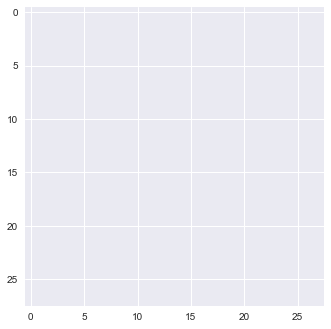

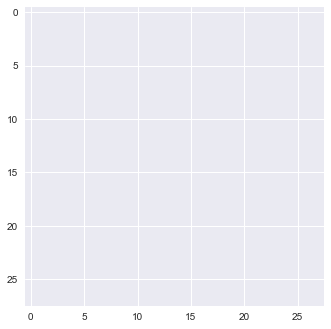

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 1, 28)
y = np.linspace(0, 1, 28).reshape(-1, 1)
ims = []
for i in range(300):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=0)
fig.set_facecolor('xkcd:white')

plt.show()

In [2]:
path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\'
name = 'biasVarErr0'
listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
dictA = []
for i,did in enumerate(listA):
    path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\' + str(did)
    dictA.append([])
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            dictA[i].append({str(did) : dirname})
            

didList = []
for i,item in enumerate(dictA):
    if len(item) == 4:
        didList.append(int([*item[0]][0]))
# clfNames.remove('SVC-rbf')

In [9]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)

In [3]:
from LocalDatasets import doneFracs
name = 'biasVarErr0'
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])
        
Bias = []
for i in enumerate(clfNames):
    Bias.append([])
for i,item in enumerate(Single):
    for j,itemz in enumerate(Single[i]):
        sumB = 0
        for k,biVaEr in enumerate(Single[i][j]):
            if biVaEr[2] == 0:
                sumB = sumB + biVaEr[0]/1
            else:
                sumB = sumB + biVaEr[0]/biVaEr[2]
            
        
        Bias[i].append(sumB/len(itemz))
for i,item in enumerate(Bias):
    for j,itemz in enumerate(Bias[i]):
        Bias[i][j] = Bias[i][j]*100
    
amountList.append(0.0)
amountList = [round(100-i*100) for i in amountList]
cl = sns.hls_palette(len(Bias), l=.3, s=.8)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(Bias)):
    _= ax.plot(range(len(Bias[i])),Bias[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(range(len(Bias[i])),amountList ,rotation='vertical')
_=plt.title('Bias percentage against instances ',fontdict = {'fontsize': 22})
_=plt.ylabel('bias percentage',fontdict = {'fontsize': 22})
_=plt.xlabel('times the numberOfInstances',fontdict = {'fontsize': 22})
fig.set_figheight(15)
fig.set_figwidth(15)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
plt.show()

NameError: name 'name' is not defined

In [17]:
instances = 0
features = 0
for did in didList:
    instances = instances + readDict(did)['NumberOfInstances']/len(didList)
    features = features + readDict(did)['NumberOfFeatures']/len(didList)
print(instances,features)

3560.3571428571427 124.7142857142857


In [2]:
from LocalDatasets import DoneFeatureMan
func = 'BiasVarianceSplitedV2'
# amountList = [0.9,0.75,0.5,0.25]
amountList = [0.25,0.5,0.75,0.9]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func2 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func2,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)
amountList.append(1.0)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,amount):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,amount))
            else:
                score1.append(read_features(func2,clfName,did,40))
                

            
        scores[i].append(score1)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):            
            score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][0])/(len(didList))
#             score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = copy(amountList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against feature percentage of dataset, features removed by least Importance' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical',fontdict = {'fontsize': 22})
_=plt.ylabel('predictive accuracy',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage features from dataset',fontdict = {'fontsize': 22})
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

NameError: name 'doneFracs' is not defined

In [35]:
func = 'BiasVarianceSplitedV2'
# amountList = [0.9,0.75,0.5,0.25]
amountList = [0.25,0.5,0.75,0.9]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func2 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func2,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)
print(didList)

[1025, 1067, 1036, 1068, 1038, 1043, 1014, 1049, 1050, 1022]


In [28]:
scoresYo = [0.901515151515,0.901515151515,0.840909090909,0.863636363636,0.871212121212,0.909090909091,0.863636363636,0.871212121212,0.863636363636,0.901515151515,0.901515151515,0.871212121212,0.878787878788,0.916666666667,0.893939393939,0.871212121212,0.878787878788,0.909090909091,0.856060606061,0.916666666667,0.901515151515,0.863636363636,0.878787878788,0.848484848485,0.833333333333,0.856060606061,0.909090909091,0.916666666667,0.886363636364,0.871212121212,0.856060606061,0.886363636364,0.901515151515,0.795454545455,0.825757575758,0.871212121212,0.901515151515,0.863636363636,0.878787878788,0.916666666667
]
scure2 = [0.901515151515,0.916666666667,0.931818181818,0.901515151515,0.856060606061,0.840909090909,0.886363636364,0.901515151515,0.878787878788,0.878787878788,0.909090909091,0.878787878788,0.931818181818,0.909090909091,0.863636363636,0.924242424242,0.939393939394,0.901515151515,0.909090909091,0.856060606061,0.863636363636,0.909090909091,0.886363636364,0.878787878788,0.909090909091,0.901515151515,0.893939393939,0.810606060606,0.916666666667,0.901515151515,0.901515151515,0.916666666667,0.893939393939,0.878787878788,0.886363636364,0.878787878788,0.909090909091,0.886363636364,0.878787878788,0.916666666667
]
scure3 = [0.878787878788,0.924242424242,0.909090909091,0.871212121212,0.871212121212,0.924242424242,0.893939393939,0.871212121212,0.840909090909,0.856060606061,0.909090909091,0.931818181818,0.916666666667,0.878787878788,0.833333333333,0.916666666667,0.893939393939,0.856060606061,0.901515151515,0.893939393939,0.901515151515,0.886363636364,0.878787878788,0.886363636364,0.818181818182,0.916666666667,0.856060606061,0.878787878788,0.893939393939,0.916666666667,0.848484848485,0.893939393939,0.916666666667,0.856060606061,0.878787878788,0.909090909091,0.878787878788,0.901515151515,0.886363636364,0.871212121212
]
print(sum(scure2)/len(scure2))
print(sum(scure3)/len(scure3))
print(sum(scoresYo)/len(scoresYo))

0.8933712121212499
0.8861742424242749
0.8785984848485


In [30]:
read_features(func,clfName,did,0.9)

[0.96262626262605, 0, 0]

In [33]:
read_features(func2,clfName,did,40)

[0.9939393939393752, 0, 0]

In [32]:
sum([0.983333333333,0.993939393939,0.995454545455,0.984848484848,0.993939393939,0.995454545455,0.998484848485,0.995454545455,0.993939393939,0.993939393939,0.990909090909,0.990909090909,0.995454545455,0.995454545455,0.99696969697,0.99696969697,0.992424242424,0.995454545455,0.99696969697,0.99696969697,0.990909090909,0.99696969697,0.993939393939,0.992424242424,0.987878787879,0.992424242424,0.995454545455,0.987878787879,0.990909090909,0.995454545455,0.995454545455,0.998484848485,0.99696969697,0.995454545455,0.99696969697,0.993939393939,0.995454545455,0.987878787879,0.995454545455,0.993939393939
    ])/len([0.983333333333,0.993939393939,0.995454545455,0.984848484848,0.993939393939,0.995454545455,0.998484848485,0.995454545455,0.993939393939,0.993939393939,0.990909090909,0.990909090909,0.995454545455,0.995454545455,0.99696969697,0.99696969697,0.992424242424,0.995454545455,0.99696969697,0.99696969697,0.990909090909,0.99696969697,0.993939393939,0.992424242424,0.987878787879,0.992424242424,0.995454545455,0.987878787879,0.990909090909,0.995454545455,0.995454545455,0.998484848485,0.99696969697,0.995454545455,0.99696969697,0.993939393939,0.995454545455,0.987878787879,0.995454545455,0.993939393939
           ])

0.993787878787975